<a href="https://colab.research.google.com/github/krishnaap/polar_dataset/blob/main/Snow_cover_extent_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cartopy # only for google colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.9 MB/s eta 0:00:00


Importing necessary modules for data handling and plotting.

In [2]:

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import pandas as pd
import os

Importing nc file as a dataset using xarray

In [3]:
file = '/content/nhsce_monthly_v00r00_19661101_20230904.nc' #opening file and file path together. No need to seperate things. This single line will do the job
ds = xr.open_dataset(file)
output_jan_means = '/content/monthly_avg_plots'  # Adjust the path as necessary
if not os.path.exists(output_jan_means):         # In the absence of such a folder, if condion will create a new folder with the same folder name
    os.makedirs(output_jan_means)


Showing the dataset, its dimensions and other attributes

In [4]:
ds

<xarray.Dataset>
Dimensions:              (x: 88, y: 88, time: 682)
Coordinates:
  * x                    (x) float32 -8.293e+03 -8.102e+03 ... 8.293e+03
  * y                    (y) float32 8.293e+03 8.102e+03 ... -8.293e+03
  * time                 (time) datetime64[ns] 1966-11-30 ... 2023-08-31
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
Data variables:
    polar_stereographic  int32 ...
    land                 (y, x) int8 ...
    area                 (y, x) float32 ...
    snow_cover_extent    (time, y, x) float32 ...
Attributes: (12/32)
    Conventions:               CF-1.7, ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (v78, 21 September 2021)
    title:                     Monthly Climate Data Record (CDR) of Northern ...
    product_version:           v00r00
    summary:                   The data record for the Monthly NH SCE CDR spa...
    keywords:                  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE > SNOW C...
    ...                        ...
    time_coverage_end:         2023-09-04
    metadata_link:             https://doi.org/10.7289/V5N014G9
    naming_authority:          gov.noaa.ncdc
    id:                        C00756
    references:                https://doi.org/10.5194/essd-7-137-2015
    license:                   No restrictions on access or use

Function for saving each monthly plots.

In [ ]:
def save_january_mean_plots(dataset, start_year, end_year):
    for year in range(start_year, end_year + 1):
        january_data = dataset.sel(time=slice(f"{year}-01-01", f"{year}-01-31"))
        avg_data = january_data['snow_cover_extent'].mean(dim='time')

        whole_avg = avg_data #saving into another variable to remember it is the whole time period.

        fig = plt.figure(figsize=(10, 10))
        ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))

        # Add gridlines, coastlines, and land features
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1, color='black', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = True
        gl.bottom_labels = True
        gl.xlocator = mticker.FixedLocator(range(-180, 181, 30))
        gl.ylocator = mticker.FixedLocator(range(60, 90, 10))
        gl.xlabel_style = {'size': 12, 'color': 'black', 'weight': 'bold'}
        gl.ylabel_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

        ax.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

        # Plot the data
        mappable = ax.pcolormesh(avg_data['longitude'], avg_data['latitude'], avg_data,
                                transform=ccrs.PlateCarree(), cmap='Blues',norm=norm)

        mappable = ax.pcolormesh(avg_data['longitude'], avg_data['latitude'], avg_data,
                                 transform=ccrs.PlateCarree(), cmap='Blues', norm=norm)
        plt.colorbar(mappable, label='Snow Cover Extent', orientation='vertical', pad=0.05, aspect=30, shrink=0.8)

        plt.savefig(f'{output_jan_means}/avg_jan_snow_cover_{year}.png', dpi=300, bbox_inches='tight')
        plt.close(fig)

Setting up norm., such as min and max limits in the colorbar

In [ ]:
min_val = 0
max_val = 1
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)

# **1.Plotting its monthly mean for each january in a time period**

In [ ]:
save_january_mean_plots(ds, 1970, 2022)


# **2. Saving mean for January for a entire time period; say 1970-2022**

In [ ]:
def calculate_overall_january_mean(dataset, start_year=None, end_year=None):
    """
    Calculates the mean snow cover extent for January months across the entire dataset
    or within a specified range of years.

    Parameters:
    - dataset: xarray Dataset containing snow cover extent data.
    - start_year: Optional; the starting year for the calculation. If None, calculation starts from the first year in the dataset.
    - end_year: Optional; the ending year for the calculation. If None, calculation goes up to the last year in the dataset.

    Returns:
    - An xarray DataArray representing the mean snow cover extent for January months across the specified years or entire dataset.
    """
    if start_year and end_year:
        # Select data for January months within the specified year range
        january_data = dataset.sel(time=(dataset['time'].dt.month == 1) & (dataset['time'].dt.year >= start_year) & (dataset['time'].dt.year <= end_year))
    else:
        # Select data for all January months in the dataset
        january_data = dataset.sel(time=(dataset['time'].dt.month == 1))

    # Calculate the mean snow cover extent for the selected January data
    whole_data = january_data['snow_cover_extent'].mean(dim='time')

    return whole_data


Calculate mean January snow cover extent for years 1970-2022


In [ ]:
whole = calculate_overall_january_mean(ds, 1970, 2022)
print(whole)


<xarray.DataArray 'snow_cover_extent' (y: 88, x: 88)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * x          (x) float32 -8.293e+03 -8.102e+03 ... 8.102e+03 8.293e+03
  * y          (y) float32 8.293e+03 8.102e+03 ... -8.102e+03 -8.293e+03
    latitude   (y, x) float64 0.6592 1.322 1.984 2.646 ... 1.984 1.322 0.6592
    longitude  (y, x) float64 145.0 144.3 143.7 143.0 ... -36.35 -35.67 -35.0


/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


# **3. Calculating average of three years**

Function for calculating mean of three years.

In [ ]:
def calculate_january_mean_of_years(dataset, years):
    """
    Calculates the mean of January snow cover extent for specified years, plots the result, and saves the plot to a file.

    Parameters:
    - dataset: xarray Dataset containing snow cover extent data.
    - years: List of years for which the mean January snow cover extent will be calculated.
    """
    january_data_years = dataset.sel(time=np.isin(dataset['time'].dt.year, years) & (dataset['time'].dt.month == 1))
    avg_data_years = january_data_years['snow_cover_extent'].mean(dim='time')

    # Plotting
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

    # Add gridlines, coastlines, and land features
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = True
    gl.bottom_labels = True
    gl.xlocator = mticker.FixedLocator(range(-180, 181, 30))
    gl.ylocator = mticker.FixedLocator(range(60, 90, 10))
    gl.xlabel_style = {'size': 12, 'color': 'black', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    # Plot the data
    norm = mcolors.Normalize(vmin=avg_data_years.min(), vmax=avg_data_years.max())
    mappable = ax.pcolormesh(avg_data_years['longitude'], avg_data_years['latitude'], avg_data_years,
                             transform=ccrs.PlateCarree(), cmap='Blues', norm=norm)

    # Add colorbar
    plt.colorbar(mappable, label='Snow Cover Extent', orientation='vertical', pad=0.05, aspect=30, shrink=0.8)

    # Set title
    title_years = ", ".join(map(str, years))
    plt.title(f'Mean Snow Cover Extent for January of {title_years}')

    # Save the plot to a file
    save_path = f"monthly_avg_plots/mean_snow_cover_{title_years.replace(', ', '_')}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to {save_path}")

    # Optionally, display the plot in the notebook or script output
    # plt.show()
    plt.close()
    return avg_data_years

Setting up the three years ( seperated by comma) and calling the function

In [ ]:
years = [1977, 1982, 2022]  # Specify the years you're interested in
mean_1977_1982_2022 = calculate_january_mean_of_years(ds, years)

# output variable for 3 year is :avg_data_years


/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


Plot saved to monthly_avg_plots/mean_snow_cover_1977_1982_2022.png


In [ ]:
print("three year January mean_____________________")
print(avg_data_years)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Mean for entire time period")
print(whole)

three year January mean_____________________
<xarray.DataArray 'snow_cover_extent' (y: 88, x: 88)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * x          (x) float32 -8.293e+03 -8.102e+03 ... 8.102e+03 8.293e+03
  * y          (y) float32 8.293e+03 8.102e+03 ... -8.102e+03 -8.293e+03
    latitude   (y, x) float64 0.6592 1.322 1.984 2.646 ... 1.984 1.322 0.6592
    longitude  (y, x) float64 145.0 144.3 143.7 143.0 ... -36.35 -35.67 -35.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mean for entire time period
<xarray.DataArray 'snow_cover_extent' (y: 88, x: 88)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],


# **4. Calculating Anomaly and its plotting**

In [ ]:

# Calculate the anomaly
anomaly = avg_data_years - whole


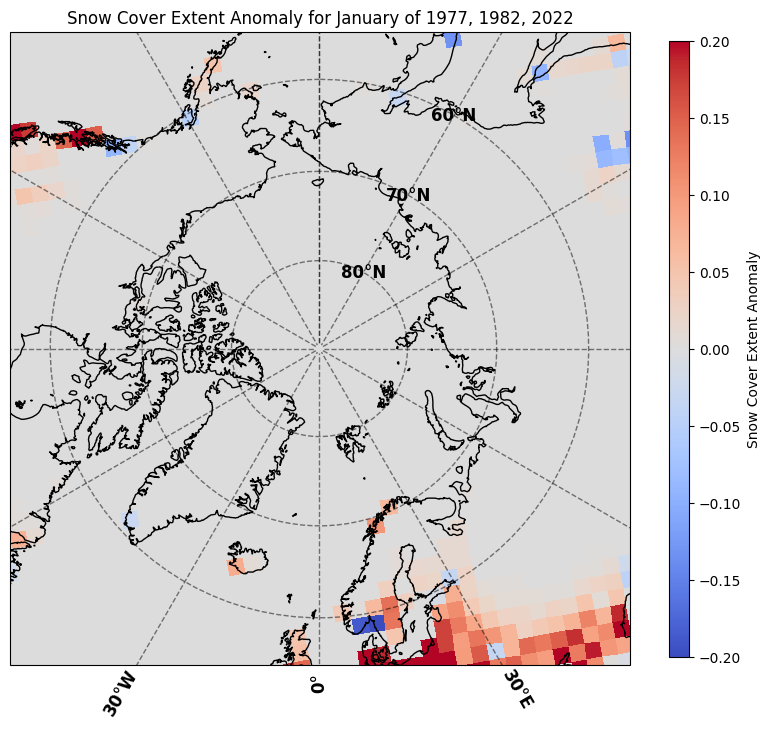

In [ ]:

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
# Setting up norm; max and min values on colorbar
min_val = -0.2
max_val = 0.2
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)

# Add gridlines, coastlines, and land features
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.xlocator = mticker.FixedLocator(range(-180, 181, 30))
gl.ylocator = mticker.FixedLocator(range(60, 90, 10))
gl.xlabel_style = {'size': 12, 'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

# Normalize the color scale based on the anomaly range
#norm = mcolors.Normalize(vmin=anomaly.min(), vmax=anomaly.max())

# Plot the anomaly data
mappable = ax.pcolormesh(anomaly['longitude'], anomaly['latitude'], anomaly,
                         transform=ccrs.PlateCarree(), cmap='coolwarm', norm=norm)

# Add colorbar
plt.colorbar(mappable, label='Snow Cover Extent Anomaly', orientation='vertical', pad=0.05, aspect=30, shrink=0.8)

# Set title
plt.title('Snow Cover Extent Anomaly for January of 1977, 1982, 2022')
plt.savefig(f'anomaly.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()